In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [60]:
data_c = pd.read_excel('data.xlsx', sheet_name = 'BD_Monitoreo')
df_c = data.filter(items = ['Sector', 'Municipio', 'Giro','ventas_porcentaje',
                         'despidos', 'credito', 'credito_solicitud', 'aumento_insumos', 
                          'aumento_precios'])

user_input = "Servicios" ## aqui el usuario ingresa el sector que desea visualizar


In [67]:
df= df_c[df_c['Sector']==user_input].reset_index() # codigo que filtra --- este es para las graficas
data = data_c[data_c['Sector']==user_input].reset_index()# codigo que filtra ---- este es para las metricas


Text(0.5, 1.0, 'Despidos')

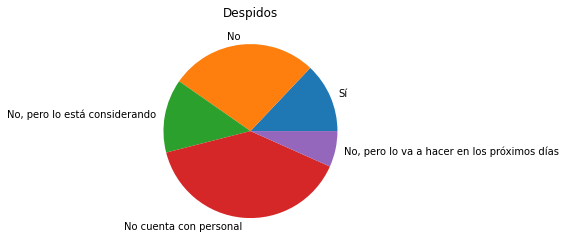

In [68]:
#despidos
si=0 
no = 0 
np = 0 
nc=0 
npd=0
for i in range(0, len(data)):
    if df['despidos'][i] == 'No':
        no += 1
    if df['despidos'][i] == 'No cuenta con personal':
        np += 1
    if df['despidos'][i] == 'No, pero lo está considerando':
        nc += 1
    if df['despidos'][i] == 'No, pero lo va a hacer en los próximos días':
        npd += 1
    if df['despidos'][i] == 'Sí':
        si += 1
    
plt.pie([si, no, np, nc, npd], labels = ['Sí','No','No, pero lo está considerando','No cuenta con personal','No, pero lo va a hacer en los próximos días'])
plt.title('Despidos')

Text(0.5, 1.0, 'Crédito')

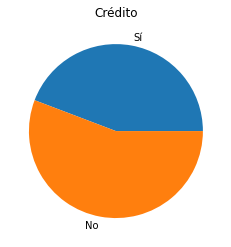

In [69]:
#Credito
si=0
no = 0
for i in range(0, len(data)):
    if df['credito'][i] == 'Sí':
        si += 1
    if df['credito'][i] == 'No':
        no += 1
        
plt.pie([si, no], labels = ['Sí','No'])
plt.title('Crédito')

Text(0.5, 1.0, 'Solicitud de crédito')

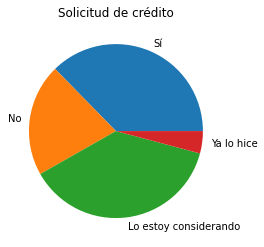

In [70]:
#Credito solicitud
si=0
no = 0
cons = 0
ya=0
for i in range(0, len(data)):
    if df['credito_solicitud'][i] == 'Sí':
        si += 1
    if df['credito_solicitud'][i] == 'No':
        no += 1
    if df['credito_solicitud'][i] == 'Lo estoy considerando':
        cons += 1
    if df['credito_solicitud'][i] == 'Ya lo hice':
        ya += 1
        
plt.pie([si, no,cons,ya], labels = ['Sí','No','Lo estoy considerando','Ya lo hice'])
plt.title('Solicitud de crédito')

Text(0.5, 1.0, 'Aumento en Costos de Operación')

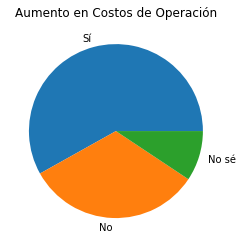

In [71]:
#Aumento insumos
si=0
no = 0
nose=0
for i in range(0, len(data)):
    if df['aumento_insumos'][i] == 'Sí':
        si += 1
    if df['aumento_insumos'][i] == 'No':
        no += 1
    if df['aumento_insumos'][i] == 'No sé':
        nose += 1
        
plt.pie([si, no,nose], labels = ['Sí','No','No sé'])
plt.title('Aumento en Costos de Operación')

Text(0.5, 1.0, 'Aumento en Costos de Operación')

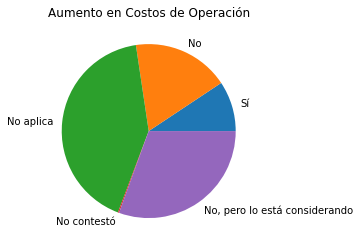

In [72]:
si=0
no = 0
na=0
nc=0
cons=0
for i in range(0, len(data)):
    if df['aumento_precios'][i] == 'Sí':
        si += 1
    if df['aumento_precios'][i] == 'No':
        no += 1
    if df['aumento_precios'][i] == 'No aplica':
        na += 1
    if df['aumento_precios'][i] == 'No contesto':
        nc += 1
    if df['aumento_precios'][i] == 'No, pero lo estoy considerando':
        cons += 1
        
plt.pie([si, no,na,nc,cons], labels = ['Sí','No','No aplica','No contestó','No, pero lo está considerando'])
plt.title('Aumento en Costos de Operación')

In [73]:
data = data.replace({"Más de 52": 52, "De 26 a 52": int(26), "No aplica": int(100), "No contesto": int(101), 
                     "No sé":int(102), "Más de un año":int(12)})

In [74]:
data['pago_salarios'] = data['pago_salarios'].astype(int)

In [75]:
# adaptabilidad astype
import numpy as np
adaptabilidad = np.zeros(len(data))
#capacidad
for i in range(0, len(data)):
    if data['capacidad'][i]>0 and data['capacidad'][i]<=25:
        adaptabilidad[i] += 1
    if data['capacidad'][i]>25 and data['capacidad'][i]<=50:
        adaptabilidad[i] += 1
    if data['capacidad'][i]>50 and data['capacidad'][i]<=75:
        adaptabilidad[i] += 2
    if data['capacidad'][i]>75 and data['capacidad'][i]<=100:
        adaptabilidad[i] += 2
        
#cerrar_razon
for i in range(0, len(data)):
    if data['cerrar_razon'][i] == 'Falta de fondos o liquidez' or data['cerrar_razon'][i] == 'Gastos elevados' \
        or data['cerrar_razon'][i] == 'Problemas con importación' or data['cerrar_razon'][i] == 'Problemas de cobranza':
        adaptabilidad[i] += 1
    else:
        adaptabilidad[i] += 0

#despidos
for i in range(0, len(data)):
    if data['despidos'][i] == 'Sí' or data['despidos'][i] == 'No cuenta con personal'\
    or data['despidos'][i] == 'No, pero lo hará en los próximos días':
        adaptabilidad[i] += 0
    if data['despidos'][i] == 'No':
        adaptabilidad[i] += 2
    if data['despidos'][i] == 'No, pero lo está considerando':
        adaptabilidad[i] += 1

#pago_salarios
for i in range(0, len(data)):
    if data['pago_salarios'][i] == 100 or data['pago_salarios'][i] == 101 or data['pago_salarios'][i] == 102:
        adaptabilidad[i] += 0
    if data['pago_salarios'][i]>0 and data['pago_salarios'][i]<=6:
        adaptabilidad[i] += 1
    if data['pago_salarios'][i]>6 and data['pago_salarios'][i]<=12:
        adaptabilidad[i] += 1
    if data['pago_salarios'][i]>12 and data['pago_salarios'][i]<=18:
        adaptabilidad[i] += 2
    if data['pago_salarios'][i]>18 and data['pago_salarios'][i]<=24:
        adaptabilidad[i] += 2

#capacidad_pago
for i in range(0, len(data)):
    if data['capacidad_pago'][i] == 'Sí':
        adaptabilidad[i] += 2
    if data['capacidad_pago'][i] == 'No':
        adaptabilidad[i] += 0
    if data['capacidad_pago'][i] == 'No sé':
        adaptabilidad[i] += 1
        
#acuerdo_laboral
for i in range(0, len(data)):
    if data['acuerdo_laboral'][i] == 'No, pero lo está considerando' \
    or data['despidos'][i] == 'No, pero lo va a hacer en los próximos días':
        adaptabilidad[i] += 1
    if data['acuerdo_laboral'][i] == 'Sí':
        adaptabilidad[i] += 2
    if data['acuerdo_laboral'][i] == 'No':
        adaptabilidad[i] += 0
        
#trabajo_casa
for i in range(0, len(data)):
    if data['trabajo_casa'][i] == 'No, pero lo está considerando' \
    or data['despidos'][i] == 'No, pero lo va a hacer en los próximos días':
        adaptabilidad[i] += 1
    if data['trabajo_casa'][i] == 'Sí':
        adaptabilidad[i] += 2
    if data['trabajo_casa'][i] == 'No':
        adaptabilidad[i] += 0
        
#trabajo_casa_motivo
for i in range(0, len(data)):
    if data['trabajo_casa_motivo'][i] == 'La naturaleza de mi negocio no lo permite' \
    or data['trabajo_casa_motivo'][i] == 'Porque se considera una actividad esencial para la emergencia':
        adaptabilidad[i] += 1
    else:
        adaptabilidad[i] += 0

#aumento_precios
for i in range(0, len(data)):
    if data['aumento_precios'][i] == 'Sí':
        adaptabilidad[i] += 2
    if data['aumento_precios'][i] == 'No':
        adaptabilidad[i] += 2
        
df['adaptabilidad'] = adaptabilidad

In [89]:
data_ec=pd.read_excel('data_estres.xlsx', sheet_name = 'BD_Monitoreo') 

In [91]:
data_ec['plantilla_porcentaje']

KeyError: 'plantilla_porcentaje'

In [88]:
# estres
estres= np.zeros(len(data))
#ventas_porcentaje
for i in range(0, len(data)):
    if data_ec['ventas_porcentaje'][i]>0 and data_ec['ventas_porcentaje'][i]<=25:
        estres[i] += 1
    if data_ec['ventas_porcentaje'][i]>25 and data_ec['ventas_porcentaje'][i]<=50:
        estres[i] += 2
    if data_ec['ventas_porcentaje'][i]>50 and data_ec['ventas_porcentaje'][i]<=75:
        estres[i] += 3
    if data_ec['ventas_porcentaje'][i]>75 and data_ec['ventas_porcentaje'][i]<=100:
        estres[i] += 4
        
#perdidas_porcentaje
for i in range(0, len(data)):
    if data_ec['perdidas_porcentaje'][i]>0 and data_ec['perdidas_porcentaje'][i]<=25:
        estres[i] += 1
    if data_ec['perdidas_porcentaje'][i]>25 and data_ec['perdidas_porcentaje'][i]<=50:
        estres[i] += 2
    if data_ec['perdidas_porcentaje'][i]>50 and data_ec['perdidas_porcentaje'][i]<=75:
        estres[i] += 3
    if data_ec['perdidas_porcentaje'][i]>75 and data_ec['perdidas_porcentaje'][i]<=100:
        estres[i] += 4
        
#capacidad
for i in range(0, len(data)):
    if data_ec['capacidad'][i]>0 and data_ec['capacidad'][i]<=25:
        estres[i] += 1
    if data_ec['capacidad'][i]>25 and data_ec['capacidad'][i]<=50:
        estres[i] += 2
    if data_ec['capacidad'][i]>50 and data_ec['capacidad'][i]<=75:
        estres[i] += 3
    if data_ec['capacidad'][i]>75 and data_ec['capacidad'][i]<=100:
        estres[i] += 4
        
#cerrar
for i in range(0, len(data)):
    if data_ec['cerrar'][i] == 'Sí':
        estres[i] += 2
    if data_ec['cerrar'][i] == 'No':
        estres[i] += 0
        
#despidos
for i in range(0, len(data)):
    if data_ec['despidos'][i] == 'Sí' or data_ec['despidos'][i] == 'No, pero lo está considerando':
        estres[i] += 2
    if data_ec['despidos'][i] == 'No' or data_ec['despidos'][i] == 'No cuenta con personal':
        estres[i] += 0
    if data_ec['despidos'][i] == 'No, pero lo hará en los próximos días':
        estres[i] += 3
        
#plantilla_porcentaje
for i in range(0, len(data)):
    if data_ec['plantilla_porcentaje'][i]>0 and data_ec['plantilla_porcentaje'][i]<=25:
        estres[i] += 1
    if data_ec['plantilla_porcentaje'][i]>25 and data_ec['plantilla_porcentaje'][i]<=50:
        estres[i] += 2
    if data_ec['plantilla_porcentaje'][i]>50 and data_ec['plantilla_porcentaje'][i]<=75:
        estres[i] += 3
    if data_ec['plantilla_porcentaje'][i]>75 and data_ec['plantilla_porcentaje'][i]<=100:
        estres[i] += 4
        
#capacidad_pago
for i in range(0, len(data)):
    if data_ec['capacidad_pago'][i] == 'Sí':
        estres[i] += 1
    if data_ec['capacidad_pago'][i] == 'No':
        estres[i] += 2
    if data_ec['capacidad_pago'][i] == 'No sé':
        estres[i] += 0

#credito
for i in range(0, len(data)):
    if data_ec['credito'][i] == 'Sí':
        estres[i] += 2
    if data_ec['credito'][i] == 'No':
        estres[i] += 0
        
#aumento_insumos
for i in range(0, len(data)):
    if data_ec['aumento_insumos'][i] == 'Sí':
        estres[i] += 3
    if data_ec['aumento_insumos'][i] == 'No':
        estres[i] += 0
        
#aumento_precios
for i in range(0, len(data)):
    if data_ec['aumento_precios'][i] == 'Sí':
        estres[i] += 3
    if data_ec['aumento_precios'][i] == 'No':
        estres[i] += 0
        
#escasez_insumos
for i in range(0, len(data)):
    if data_ec['escasez_insumos'][i] == 'Sí':
        estres[i] += 3
    if data_ec['escasez_insumos'][i] == 'No':
        estres[i] += 0
        
#aumento_tipocambio
for i in range(0, len(data)):
    if data_ec['aumento_tipocambio'][i] == 'Sí':
        estres[i] += 4
    if data_ec['aumento_tipocambio'][i] == 'No':
        estres[i] += 0

KeyError: 'plantilla_porcentaje'

,Folio,IDCuestionario,Municipio,Sector,Giro,rango_empleados,Tamaño,tiempo_operacion,años_empresa,provedores,...,lineamientos,lineamientos_nivel_federal,lineamientos_nivel_estatal,lineamientos_nivel_municipal,lineamientos_nivel_otro,filtros_sanitarios,plan,tipo_plan,oportunidades,tipo_oportunidades
0,1,209465869,Guadalajara,Servicios,Otro,0 a 5,Micro,10,De seis a diez años,5,...,Sí,Gobierno Federal,Gobierno del Estado de Jalisco,NaN,NaN,Sí,Sí,Desarrollar plan estratégico de publicidad,No,No aplica
1,2,209465878,Zapopan,Servicios,"Estéticas, salones de belleza y peluquerías",0 a 5,Micro,2,De uno a dos años,4,...,No contesto,NaN,NaN,NaN,NaN,No contesto,Sí,Competir en precio (descuentos y promociones p...,Sí,Ampliar número de servicios ofrecidos
2,3,209465880,Guadalajara,Manufactura,Impresión,0 a 5,Micro,4,De tres a cinco años,6,...,No contesto,NaN,NaN,NaN,NaN,No contesto,No,No aplica,No,No aplica
3,4,209465895,Guadalajara,Servicios,Consultorios dentales,0 a 5,Micro,26,Más de diez años,10,...,No contesto,NaN,NaN,NaN,NaN,No contesto,Sí,Empezar o mejorar su propia página de comercio...,No,No aplica
4,5,209465949,Guadalajara,Comercio,Otro,6 a 10,Micro,5,De tres a cinco años,3,...,No contesto,NaN,NaN,NaN,NaN,No contesto,Sí,Conseguir crédito para invertir en el negocio,No,No aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,1704,209713936,Guadalajara,Servicios,Restaurantes,0 a 5,Micro,6,De seis a diez años,17,...,Sí,NaN,NaN,Gobierno Municipal,NaN,No,No,No aplica,No,No aplica
1704,1705,209714225,Tlaquepaque,Servicios,Otro,11 a 30,Pequeña,15,Más de diez años,8,...,No contesto,NaN,NaN,NaN,NaN,No contesto,No,No aplica,No,No aplica
1705,1706,209714226,Guadalajara,Comercio,Otro,0 a 5,Micro,16,Más de diez años,10,...,No,NaN,NaN,NaN,NaN,Sí,Sí,Conseguir crédito para invertir en el negocio,Sí,Ampliar número de productos ofrecidos
1706,1707,209714298,Guadalajara,Servicios,Despachos jurídicos,0 a 5,Micro,27,Más de diez años,9,...,Sí,Gobierno Federal,Gobierno del Estado de Jalisco,Gobierno Municipal,NaN,Sí,No,No aplica,Sí,Mayor digitalización
